In [ ]:
!pip install torch-scatter torch-sparse torch-geometric torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00


In [ ]:
import torch

In [ ]:
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader

In [ ]:
path = './qm9'
dataset = QM9(path)

In [ ]:
print(f'Dataset: {dataset}:')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')


Dataset: QM9(130831):
Number of graphs: 130831
Number of features: 11
Number of targets: 130831


In [ ]:
data = dataset[12312]
print(data)

Data(x=[15, 11], edge_index=[2, 30], edge_attr=[30, 4], y=[1, 19], pos=[15, 3], idx=[1], name='gdb_12607', z=[15])


In [ ]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

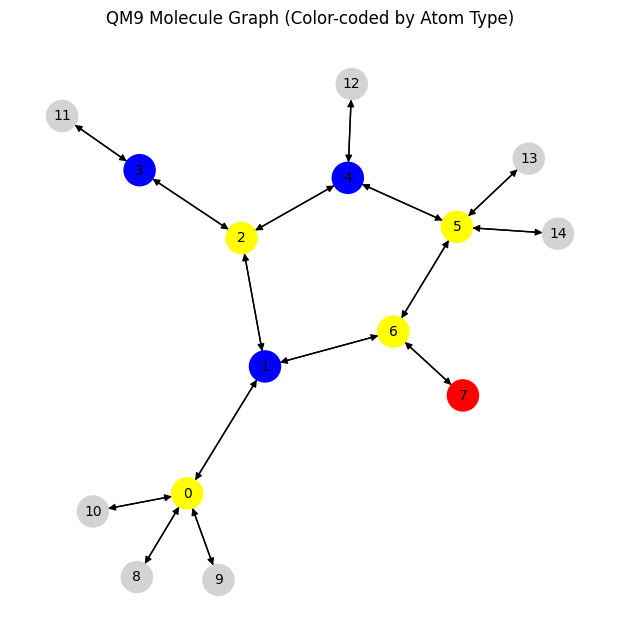

In [ ]:
atom_types = data.z.tolist()

atom_color_map = {
    1: 'lightgray',  # Hydrogen
    6: 'yellow',      # Carbon
    7: 'blue',       # Nitrogen
    8: 'red',        # Oxygen
    9: 'green'       # Fluorine
}

node_colors = [atom_color_map.get(z, 'purple') for z in atom_types]

G = to_networkx(data, node_attrs=['z'], edge_attrs=['edge_attr'])

plt.figure(figsize=(6, 6))
nx.draw(G,
        node_color=node_colors,
        with_labels=True,
        node_size=500,
        font_size=10)

plt.title('QM9 Molecule Graph (Color-coded by Atom Type)')
plt.show()

In [ ]:
print(f"Node feature shape: {data.x.shape}")

# Print the raw feature matrix
print("Node features:")
print(data.x)

# If you want to inspect individual node features
for idx, features in enumerate(data.x):
    print(f"Atom {idx}: {features.tolist()}")

Node feature shape: torch.Size([15, 11])
Node features:
tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 3.],
        [0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
Atom 0: [0.0, 1.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0]
Atom 1: [0.0, 0.0, 1.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Atom 